In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("economic_data.csv")

In [3]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [5]:
#drop unnecssary data
df.drop(columns = ["year","month"],axis = 1,inplace = True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
#check null value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

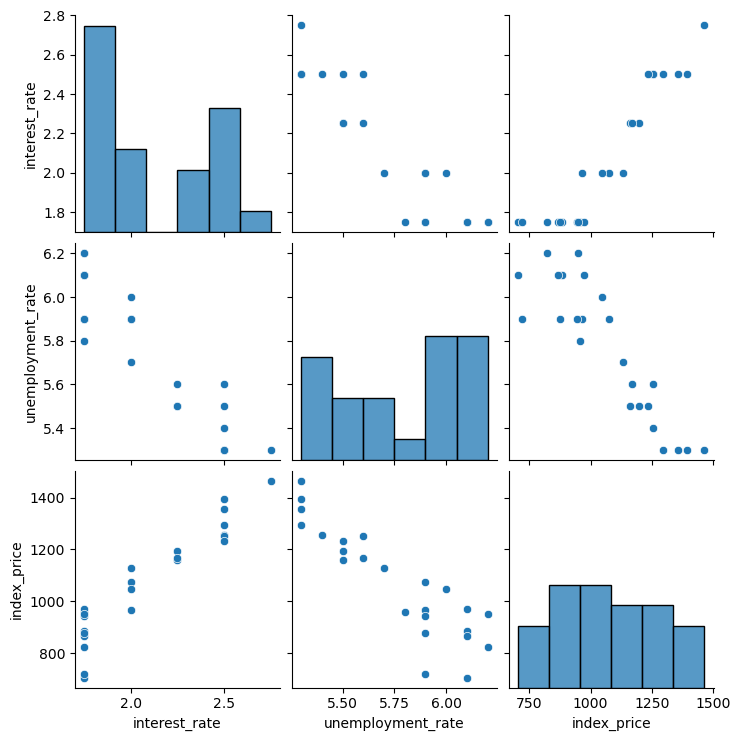

In [8]:
#visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.916966,0.937383
unemployment_rate,-0.916966,1.000000,-0.892457
index_price,0.937383,-0.892457,1.000000


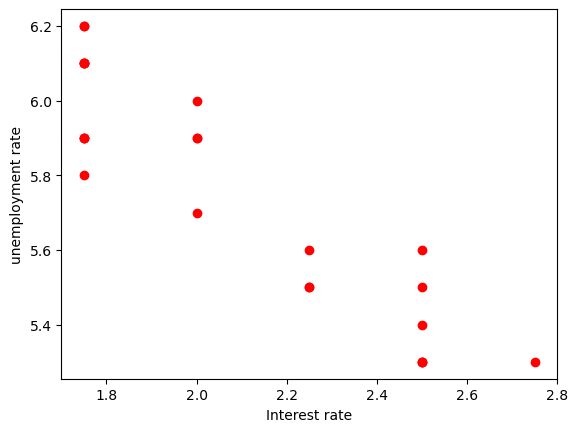

In [15]:
plt.scatter(df["interest_rate"],df["unemployment_rate"],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")
plt.show()

In [15]:
#dependent & Independent value
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
x.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [16]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=42)


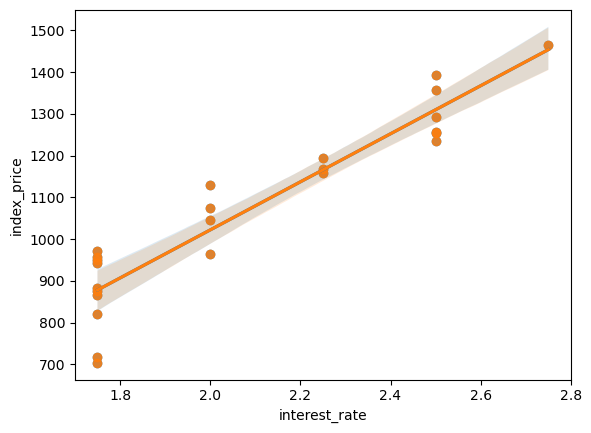

In [22]:
sns.regplot(x = df["interest_rate"],y = df["index_price"])
plt.show()

In [18]:
#standraization
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [38]:
X_train

array([[-0.2096109 ,  0.47218126],
       [ 1.29958761, -1.48918706],
       [-0.96421016,  1.45286542],
       [ 1.29958761, -0.5085029 ],
       [ 1.29958761, -1.48918706],
       [-0.2096109 ,  0.79907598],
       [-0.96421016,  0.14528654],
       [ 1.29958761, -1.48918706],
       [ 1.29958761, -1.16229234],
       [-0.96421016,  1.1259707 ],
       [-0.96421016,  1.45286542],
       [-0.96421016,  0.47218126],
       [-0.96421016,  0.47218126],
       [ 0.54498835, -0.83539762],
       [-0.2096109 , -0.18160818],
       [-0.96421016,  0.47218126],
       [-0.96421016,  1.1259707 ],
       [ 1.29958761, -0.83539762]])

In [21]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [27]:
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
#Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                   cv=3)

In [30]:
np.mean(validation_score)

-6146.296918650903

In [32]:
y_pred = regression.predict(X_test)

In [33]:
y_pred

array([1154.86855704,  830.68110875, 1397.54700325,  830.68110875,
        972.39758237, 1134.49130652])

In [34]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6424.906043431921
66.55555555555561
80.15551162229532


In [36]:
#R scuared
from sklearn.metrics import r2_score

In [37]:
score = r2_score(y_test,y_pred)
print(score)

0.8091498689991904


In [38]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.681916448331984

## Assumption


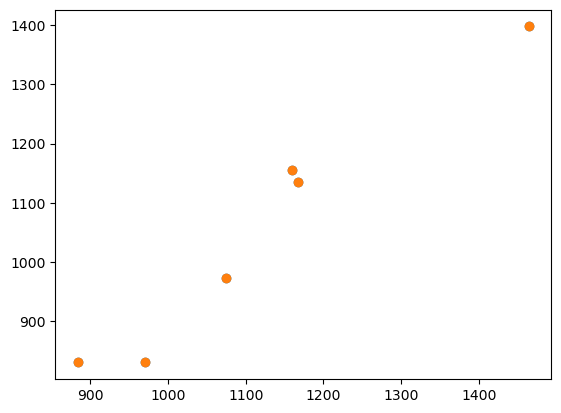

In [40]:
plt.scatter(y_test,y_pred)
plt.show()

In [41]:
residuals = y_test-y_pred
print(residuals)

8       4.131443
16    140.318891
0      66.452997
18     53.318891
11    102.602418
9      32.508693
Name: index_price, dtype: float64


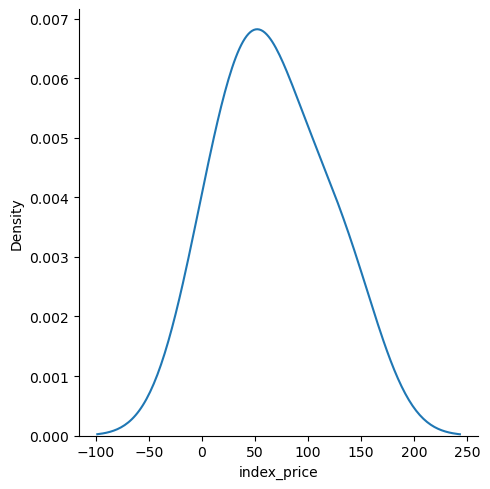

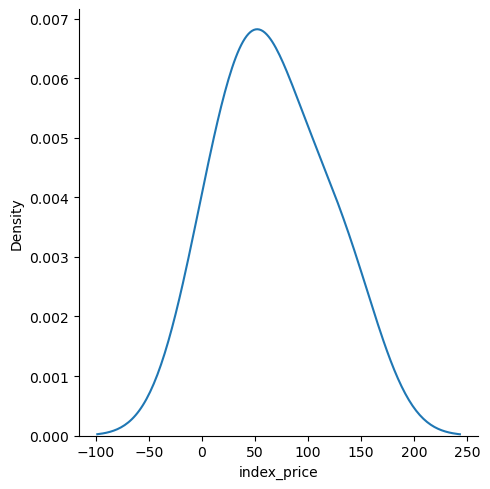

In [44]:
#Plot this residuals
sns.displot(residuals,kind='kde')
plt.show()

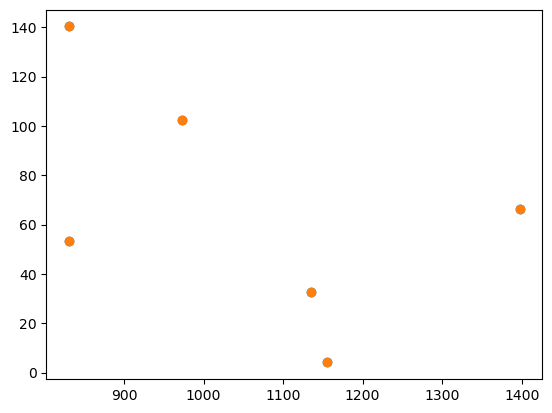

In [46]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
plt.show()

In [47]:
#OlS Linear Regression
import statsmodels.api as sm

In [48]:
model = sm.OLS(y_train,X_train).fit()

In [49]:
prediction= model.predict(X_test)
print(prediction)

[ 101.42411259 -222.7633357   344.10255881 -222.7633357   -81.04686207
   81.04686207]


In [50]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.087
Method:                 Least Squares   F-statistic:                             0.2797
Date:                Wed, 10 Sep 2025   Prob (F-statistic):                       0.760
Time:                        12:02:54   Log-Likelihood:                         -150.86
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\somra\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [54]:
print(regression.coef_)

[139.77552179 -61.97498796]
